K-Means is a clustering algorithm. Like all clustering algorithms, it is unsupervised.

Test data: The iris dataset, ignoring labels

In [1]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
x = iris['data']
y = iris['target']
x_features = iris['feature_names']
y_labels = iris['target_names']

Visualize the dataset's first 3 features.

In [3]:
print('features are: {}'.format(x_features[:3]))

features are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']


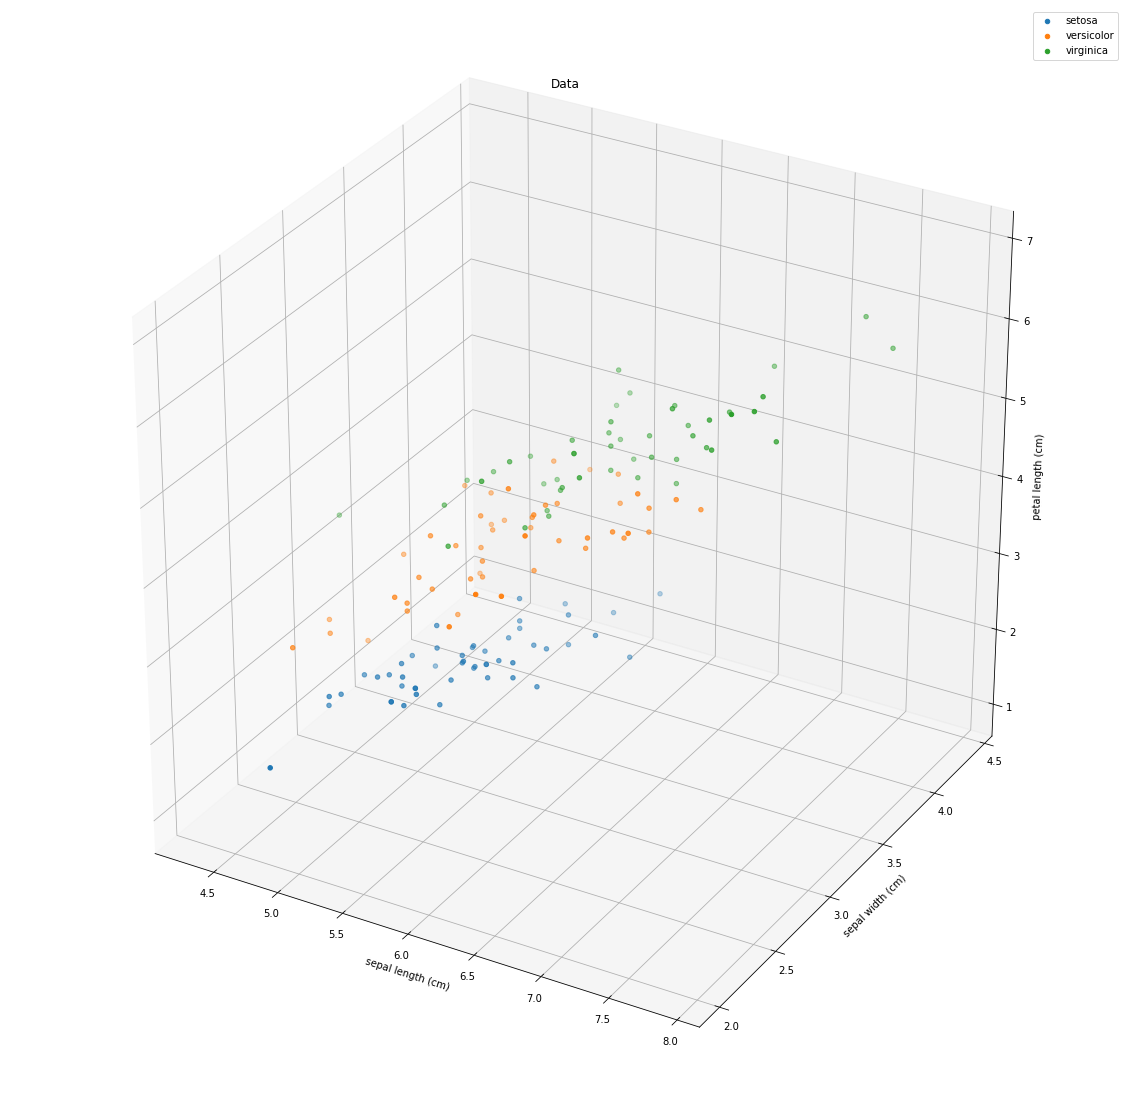

In [4]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    matches = y == label
    ax.scatter(x[:, 0][matches], x[:, 1][matches], x[:, 2][matches], c='C{}'.format(label), label=y_labels[label])
ax.set_xlabel(x_features[0])
ax.set_ylabel(x_features[1])
ax.set_zlabel(x_features[2])
ax.set_title('Data')
ax.legend(labels=y_labels)

Visualize the dataset's last three features

In [5]:
print('features are: {}'.format(x_features[1:]))

features are: ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


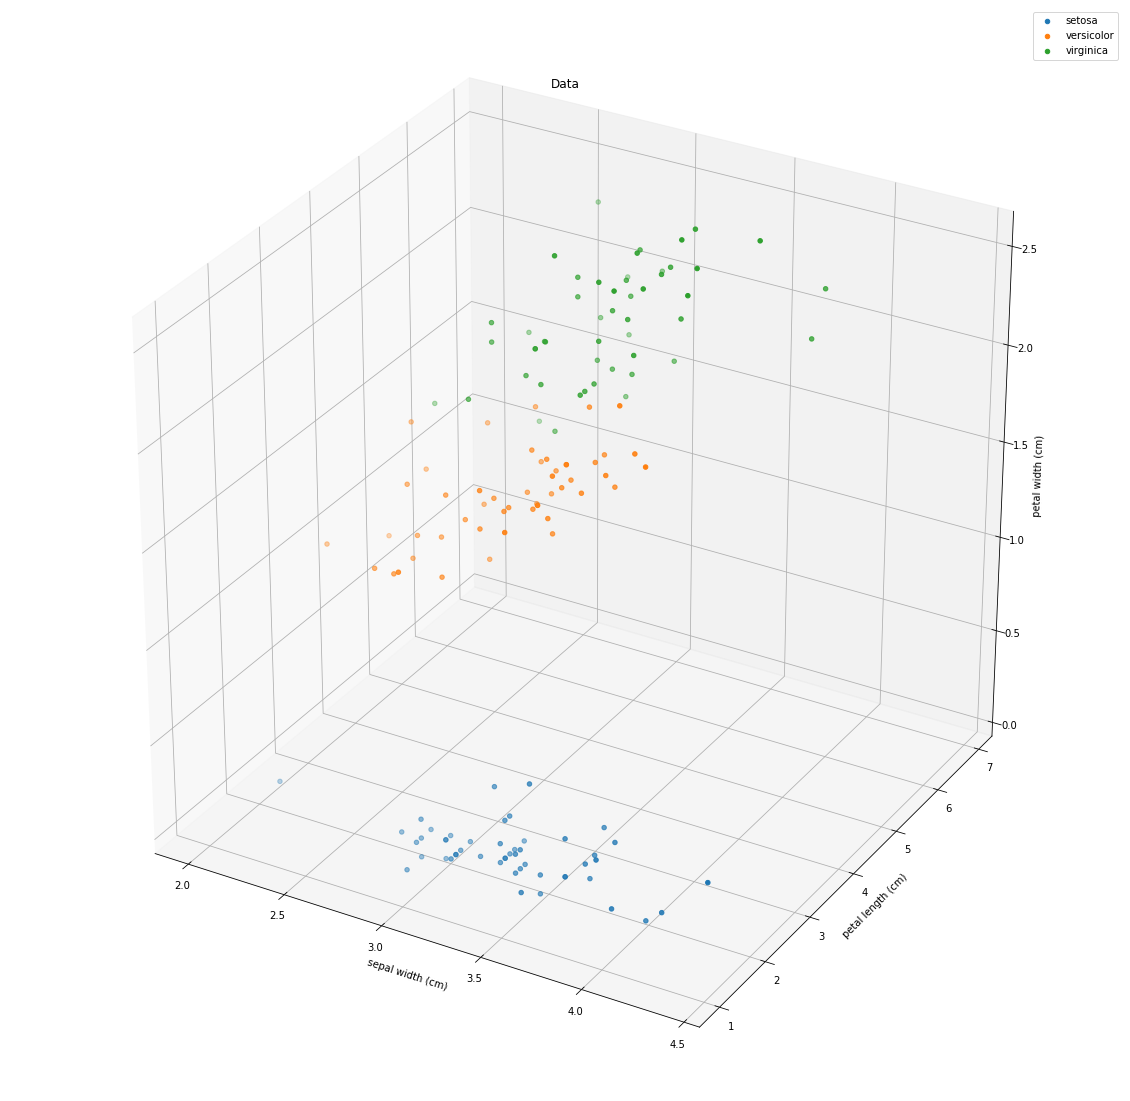

In [6]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    matches = y == label
    ax.scatter(x[:, 1][matches], x[:, 2][matches], x[:, 3][matches], c='C{}'.format(label), label=y_labels[label])
ax.set_xlabel(x_features[1])
ax.set_ylabel(x_features[2])
ax.set_zlabel(x_features[3])
ax.set_title('Data')
ax.legend(labels=y_labels)

Looking at the 3D vis, it looks like features 2 and 3 are the most important. Visualize all 2 feature combinations

Text(0.5, 0.98, 'All 2 feature combinations')

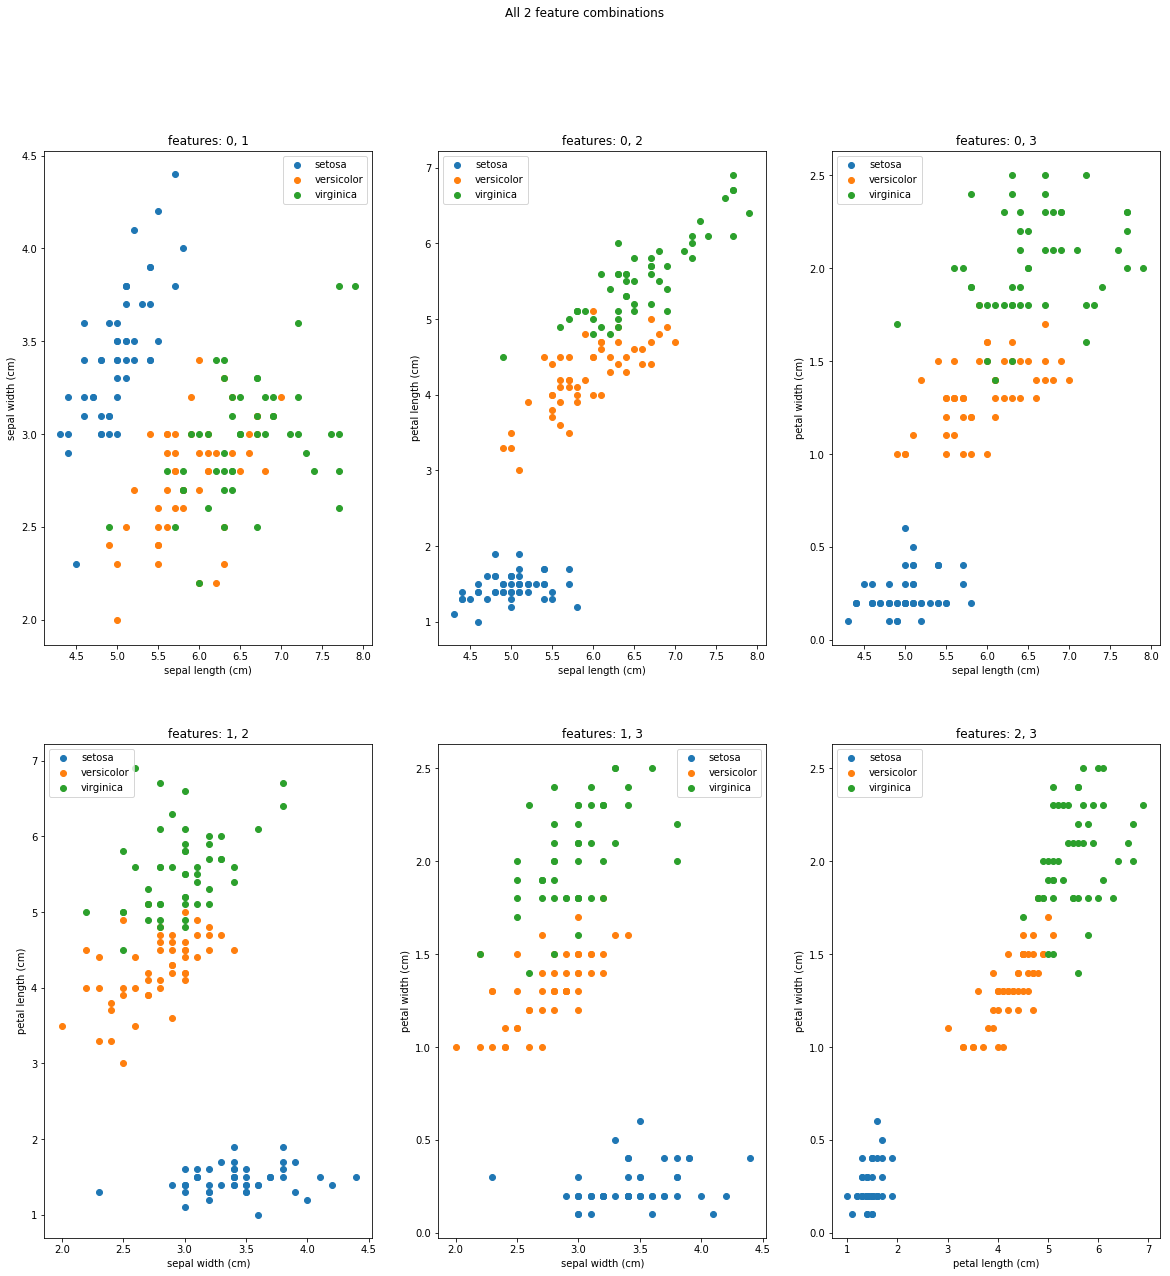

In [7]:
fig = plt.figure(figsize=(20,20))
for i, (feature1, feature2) in enumerate(itertools.combinations(range(x.shape[1]), 2)):
    ax = fig.add_subplot(int('23{}'.format(i+1)))
    for label in np.unique(y):
        matches = y == label
        ax.scatter(x[:, feature1][matches], x[:, feature2][matches], c='C{}'.format(label), label=y_labels[label])
    ax.set_xlabel(x_features[feature1])
    ax.set_ylabel(x_features[feature2])
    ax.set_title('features: {}, {}'.format(feature1, feature2))
    ax.legend(labels=y_labels)
fig.suptitle('All 2 feature combinations')

For k-means, k stands for the number of clusters. Looking at the data (ignoring the labels), we clearly see at least two and maybe three clusters. I think the plot of features 0, 3 shows the three clusters most clearly.

In this case, we know apriori there are 3 clusters, since we know there are three class labels. However, the number of clusters is determined by looking at the data, as k means is an unsupervised algorithm.

From these plots, it looks like setosa can be easily separated by features 2 and 3. These features also seem highly correlated.
Feature 0 seems unhelpful in separating out versicolor and virginica.
Feature 2 could separate out versicolor and virginica, with a decision boundary around 4.7

Try clustering with k=3

In [8]:
k=3

In [9]:
features = (0, 3)
feature1, feature2 = features
x1, x2 = x[:, feature1], x[:, feature2]
xdata = np.vstack((x1, x2)).T
x1min, x1max = np.min(x1), np.max(x1)
x2min, x2max = np.min(x2), np.max(x2)
print('x1:: [{}, {}], range: {}'.format(x1min, x1max, x1max-x1min))
print('x2:: [{}, {}], range: {}'.format(x2min, x2max, x2max-x2min))

x1:: [4.3, 7.9], range: 3.6000000000000005
x2:: [0.1, 2.5], range: 2.4


Randomly initialize the centroids in the space.

In [10]:
centroids = np.zeros(shape=(k, 2))
for i in range(k):
    x1center = (np.random.random() * (x1max - x1min)) + x1min
    x2center = (np.random.random() * (x2max - x2min)) + x2min
    centroids[i] = (x1center, x2center)
centroids

array([[6.1010302 , 2.01529934],
       [5.51750573, 2.11978221],
       [6.65565219, 2.2892611 ]])

Visualize the centroids overlaid on the data.

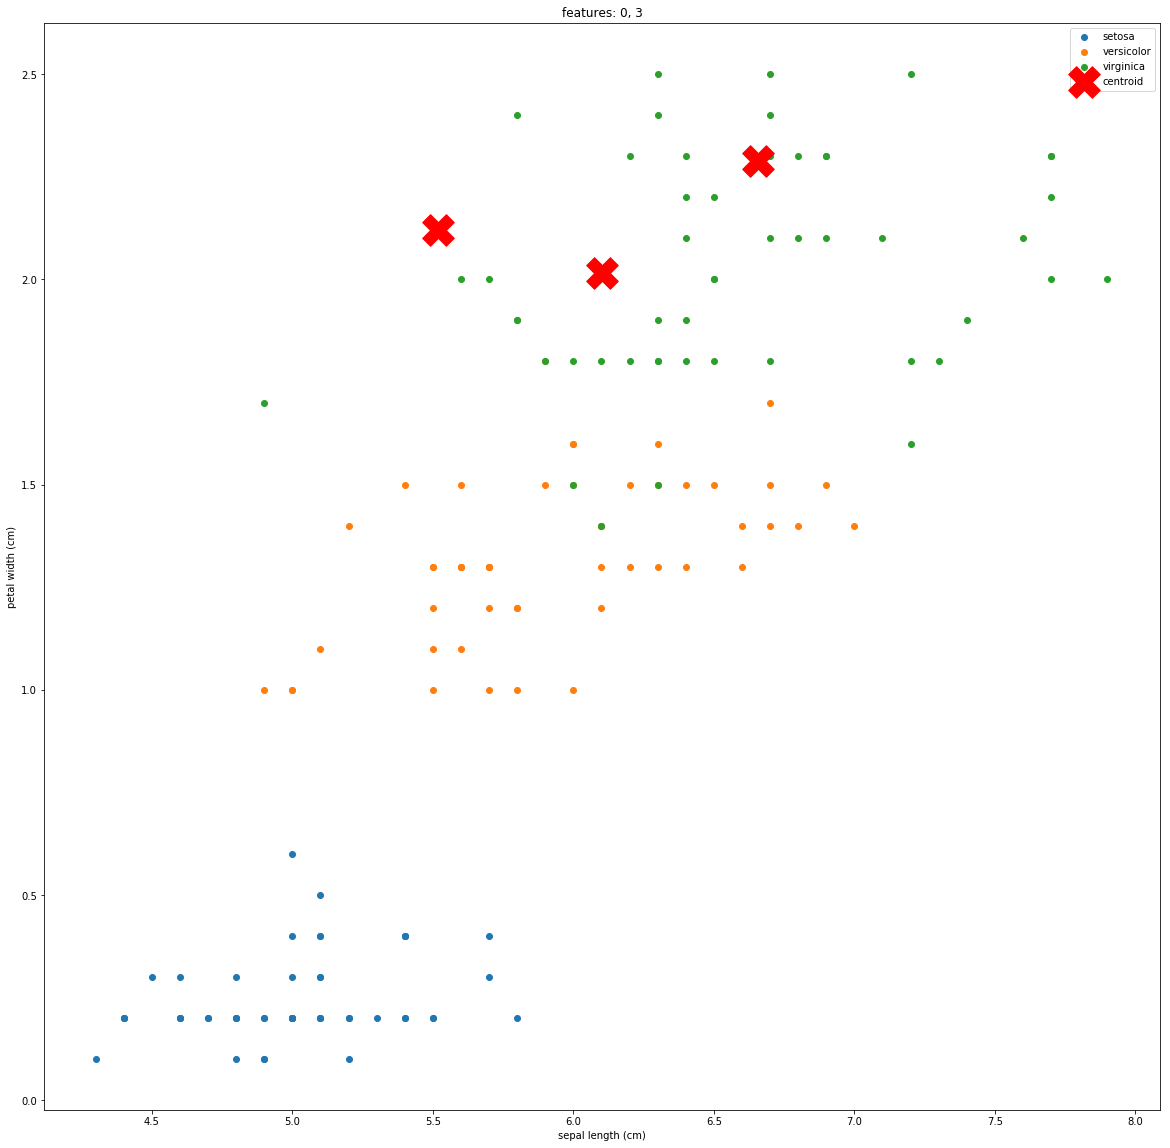

In [11]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
for label in np.unique(y):
    matches = y == label
    ax.scatter(x[:, feature1][matches], x[:, feature2][matches], c='C{}'.format(label), label=y_labels[label])

ax.scatter(centroids[:, 0], centroids[:, 1], c='R', marker='X', s=1000, label='centroid')

ax.set_xlabel(x_features[feature1])
ax.set_ylabel(x_features[feature2])
ax.set_title('features: {}, {}'.format(feature1, feature2))
ax.legend()

In [12]:
import scipy

In [13]:
threshold = 1e-9
iterations = 0

# loop through these two steps until convergence
while 1:
    # 1. assign the points to the nearest cluster.
    assignments = np.zeros(shape=len(x), dtype=np.int)
    for i, point in enumerate(xdata):
        # compute distances to all centroids
        distances = []
        for centroid in centroids:
            distances.append(scipy.spatial.distance.euclidean(point, centroid))
        assignments[i] = np.argmin(distances)

    # 2. move the centroids to the center of the assigned points.
    old_centroids = centroids.copy()
    for i, centroid in enumerate(centroids):
        assigned_points = xdata[assignments == i]
        centroids[i] = np.mean(assigned_points, axis=0)
    
    moved_amount = np.sum([
        scipy.spatial.distance.euclidean(old, new) for old, new in zip(old_centroids, centroids)
    ])
    iterations += 1
    if moved_amount < threshold:
        break
print('Converged in {} iterations'.format(iterations))

Converged in 7 iterations


Visualize the converged centroids

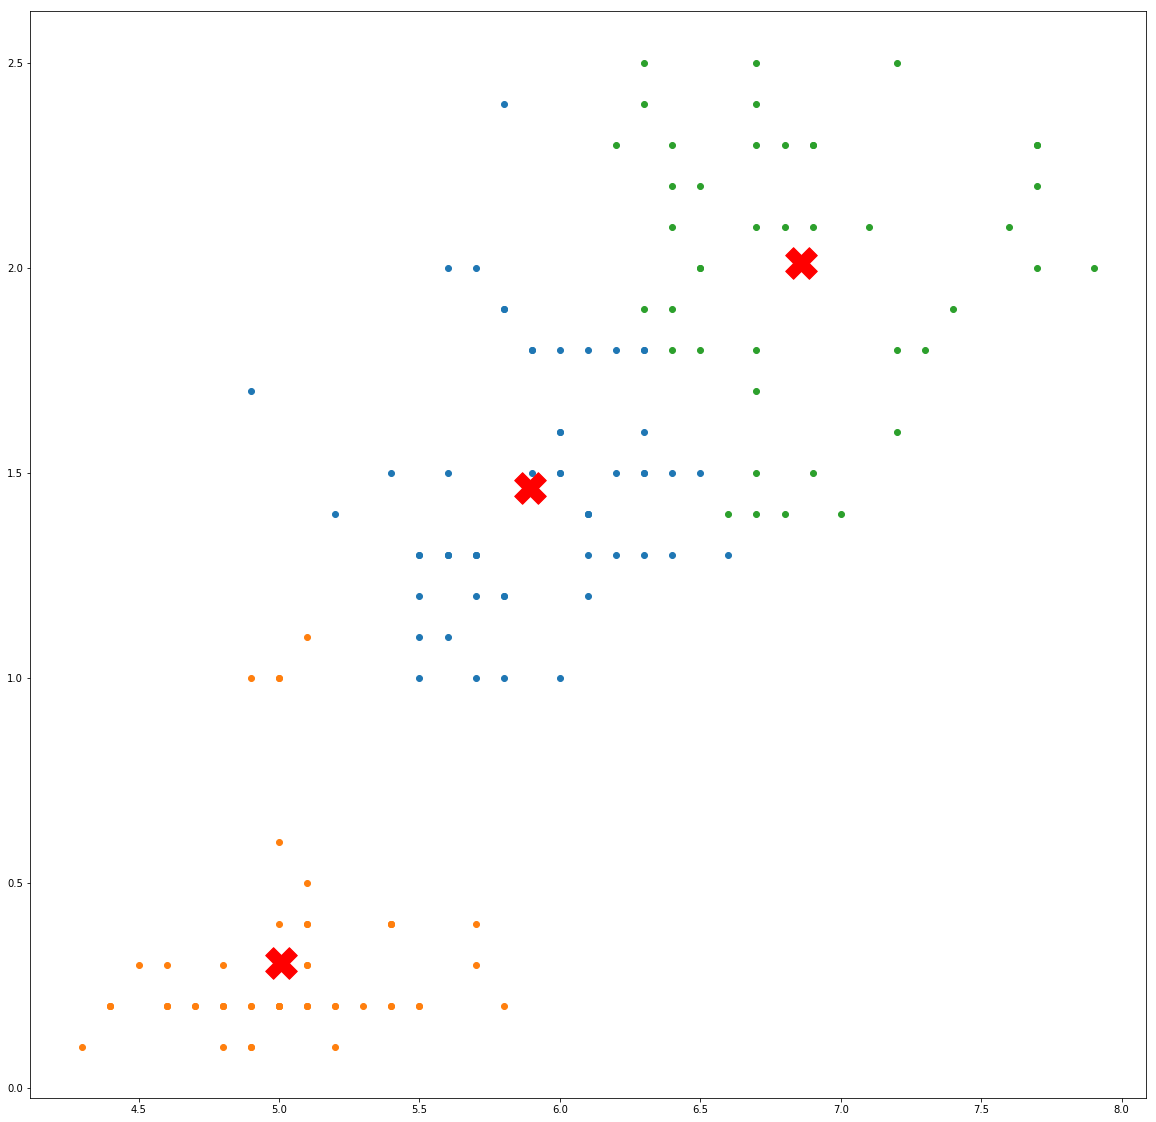

In [14]:
plt.figure(figsize=(20,20))
for i, centroid in enumerate(centroids):
    assigned_points = xdata[assignments == i]
    plt.scatter(assigned_points[:,0], assigned_points[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='R', marker='X', s=1000, label='centroid')

Compare the results to GT data. Remember, the actual category doesn't map to the real GT label, so first build the mapping.

In [15]:
y_labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
x2_sorted = np.argsort(centroids[:, 1])
label_setosia = x2_sorted[0]
label_versicolor = x2_sorted[1]
label_virginica = x2_sorted[2]
cluster_to_gt = {label_setosia: 0, label_versicolor: 1, label_virginica: 2}
cluster_to_gt

{1: 0, 0: 1, 2: 2}

In [17]:
assignments_translated = np.array([cluster_to_gt[sample] for sample in assignments])

In [18]:
total_wrong = np.count_nonzero(assignments_translated != y)
fraction_wrong = total_wrong / len(y)
print('total_wrong: {}, fraction_wrong: {}'.format(total_wrong, fraction_wrong))

total_wrong: 26, fraction_wrong: 0.17333333333333334


Visualize the errors with a confusion matrix.

Text(0.5, 1.0, 'confusion matrix: gt vs pred')

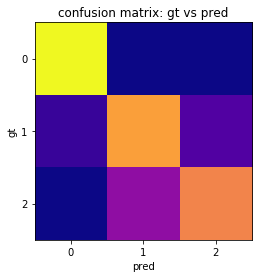

In [19]:
N_LABELS = len(y_labels)
confusion = np.zeros(shape=(N_LABELS, N_LABELS), dtype=np.int)
for pred, gt in zip(assignments_translated, y):
    confusion[gt, pred] += 1
plt.imshow(confusion, cmap='plasma')
plt.xlabel('pred')
plt.xticks(range(N_LABELS))
plt.ylabel('gt')
plt.yticks(range(N_LABELS))
plt.title('confusion matrix: gt vs pred')

As expected, the most confusion is between classes 1 and 2, because their separation is not so clear.